# Chapter 5 Image Enhancement

## Introduction

### In this chapter, we discuss a few more image enhancement techniques. These techniques transform the pixel values in the input image to a new value in the output image using a mapping function. We discuss logarithmic transformation, power law transformation, image inverse, histogram equalization, and contrast stretching.

## Pixel Transformation

A transformation is a function that maps a set of inputs to a set of
outputs so that each input has exactly one output. For example, T(x) =
x 2 is a transformation that maps inputs to corresponding squares of
input.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

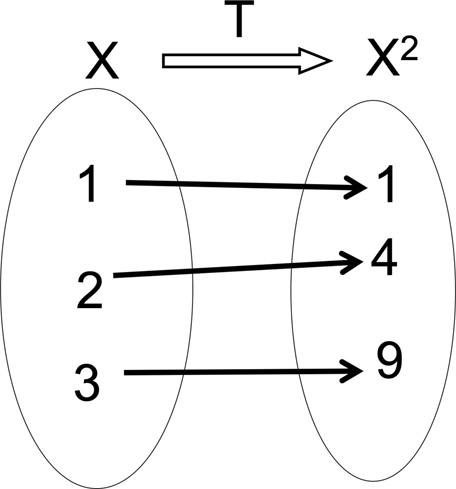

In [2]:
from IPython.display import Image 
Image("../Figures/Illustration of transformation.png")

### A transformation is a function that maps a set of inputs to a set of outputs so that each input has exactly one output.

## Image Inverse   

### Image inverse transformation is a linear transformation. The goal is to transform the dark intensities in the input image to bright intensities in the output image and vice versa.

Text(0.5, 1.0, 'output 255')

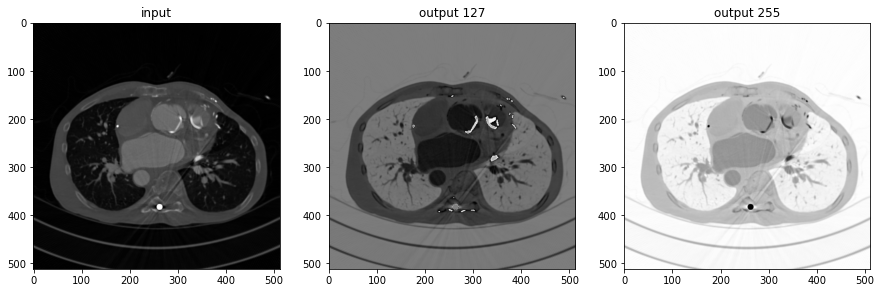

In [3]:
# Opening the image.
im = cv2.imread('../Figures/imageinverse_input.png')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im)
ax1.set_title('input')

# Performing the inversion operation
im2 = 127 - im

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(im2)
ax1.set_title('output 127')

im3 = 255 - im

ax1 = fig.add_subplot(1,3,3)
ax1.imshow(im3)
ax1.set_title('output 255')

Text(0.5, 1.0, 'output 255')

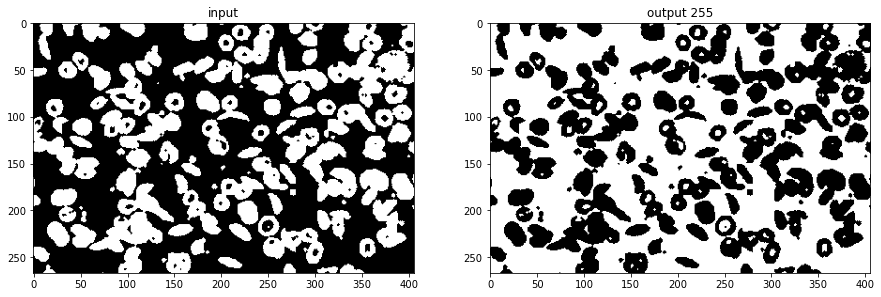

In [4]:
# Opening the image.
im = cv2.imread('../Figures/cIEFl.png')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(im)
ax1.set_title('input')

# Performing the inversion operation
im3 = 255 - im

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(im3)
ax2.set_title('output 255')

## Power Law Transformation

### Power law transformation, also known as gamma-correction, is used to enhance the quality of the image.

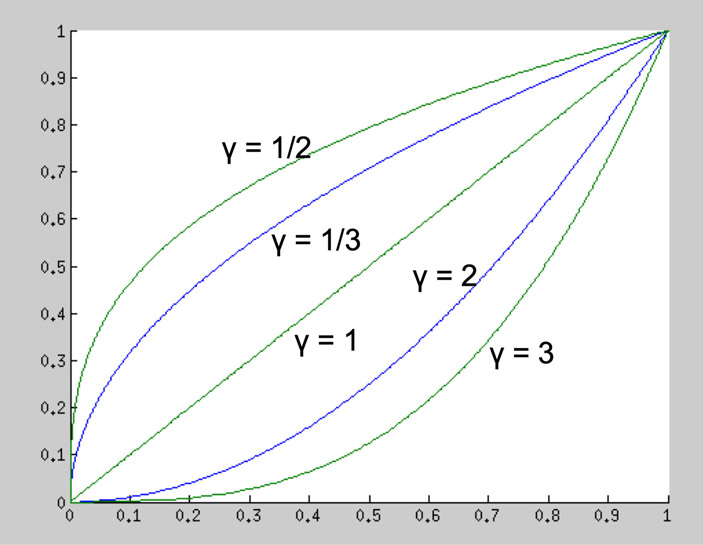

In [5]:
Image("../Figures/Graph of power law transformation for different γ.png")

<ipython-input-6-0ba62646b75e>:17: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2) * gamma
<ipython-input-6-0ba62646b75e>:18: RuntimeWarning: divide by zero encountered in log
  b5 = np.log(b2) * gamma2


Text(0.5, 1.0, 'Gamma-corrected image with γ = 3')

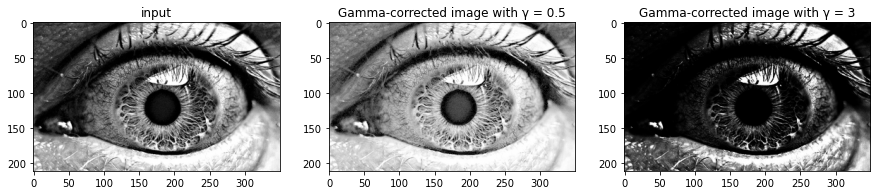

In [6]:
import numpy as np
import math
# Opening the image.
a = cv2.imread('../Figures/Eye.png')
# gamma is initialized.
gamma = 0.5
gamma2 = 3

# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized
b2 = b1/b3
# gamma-correction exponent is computed.

b4 = np.log(b2) * gamma
b5 = np.log(b2) * gamma2

# gamma-correction is performed.
c1 = np.exp(b4)*255.0
c2 = np.exp(b5)*255.0

# c is converted to type int.
c1 = c1.astype(int)
c2 = c2.astype(int)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(a)
ax1.set_title('input')

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(c1)
ax1.set_title('Gamma-corrected image with γ = 0.5')

ax1 = fig.add_subplot(1,3,3)
ax1.imshow(c2)
ax1.set_title('Gamma-corrected image with γ = 3')

## Log Transformation

### Log transformation is used to enhance pixel intensities that are otherwise missed due to a wide range of intensity values or lost at theexpense of high-intensity values.

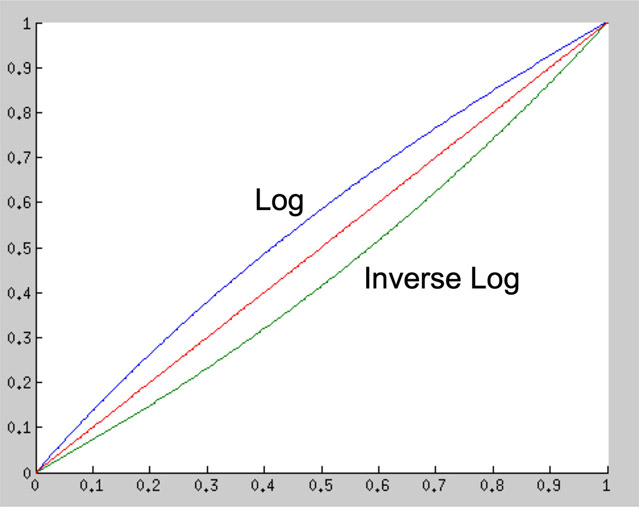

In [7]:
Image("../Figures/Log.png")

Text(0.5, 1.0, 'Output')

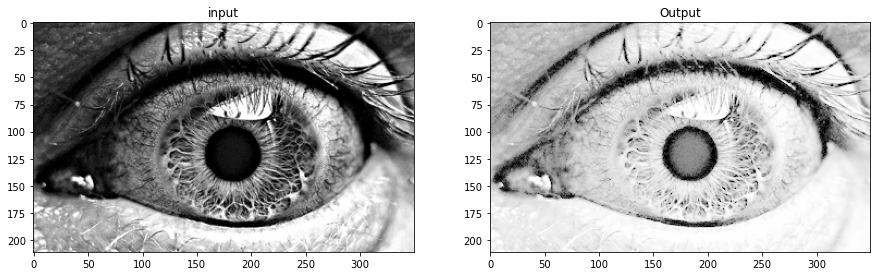

In [8]:
import cv2
import numpy, math
# Opening the image.
a = cv2.imread('../Figures/Eye.png')
# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(a)
ax1.set_title('input')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(c1)
ax1.set_title('Output')

## Histogram Equalization

### The histogram of an image was discussed in Chapter 3, “Image and its Properties.” The histogram of an image is a discrete function, its input is the gray-level value and the output is the number of pixels with that gray-level value and can be given as h(x n ) = y n . In a grayscale image, the intensities of the image take values between [0, L − 1].

Text(0.5, 1.0, 'Output')

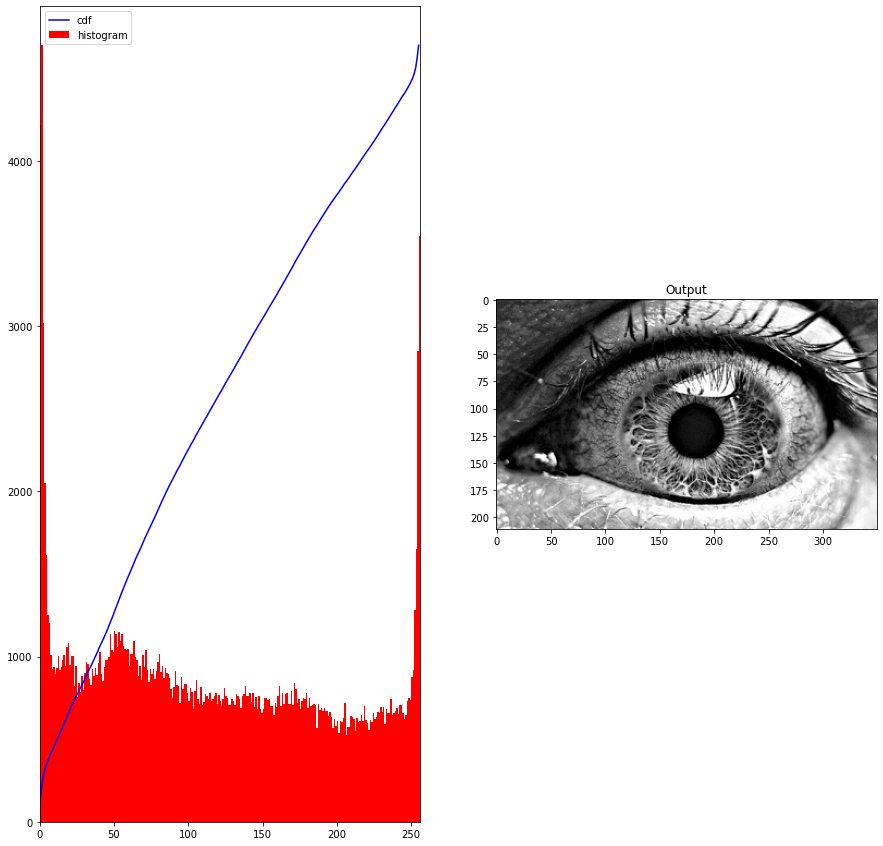

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Figures/Eye.png')

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(cdf_normalized, color = 'b')
ax1 = plt.hist(img.flatten(),256,[0,256], color = 'r')
ax1 = plt.xlim([0,256])
ax1 = plt.legend(('cdf','histogram'), loc = 'upper left')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)
ax2.set_title('Output')

Text(0.5, 1.0, 'Output')

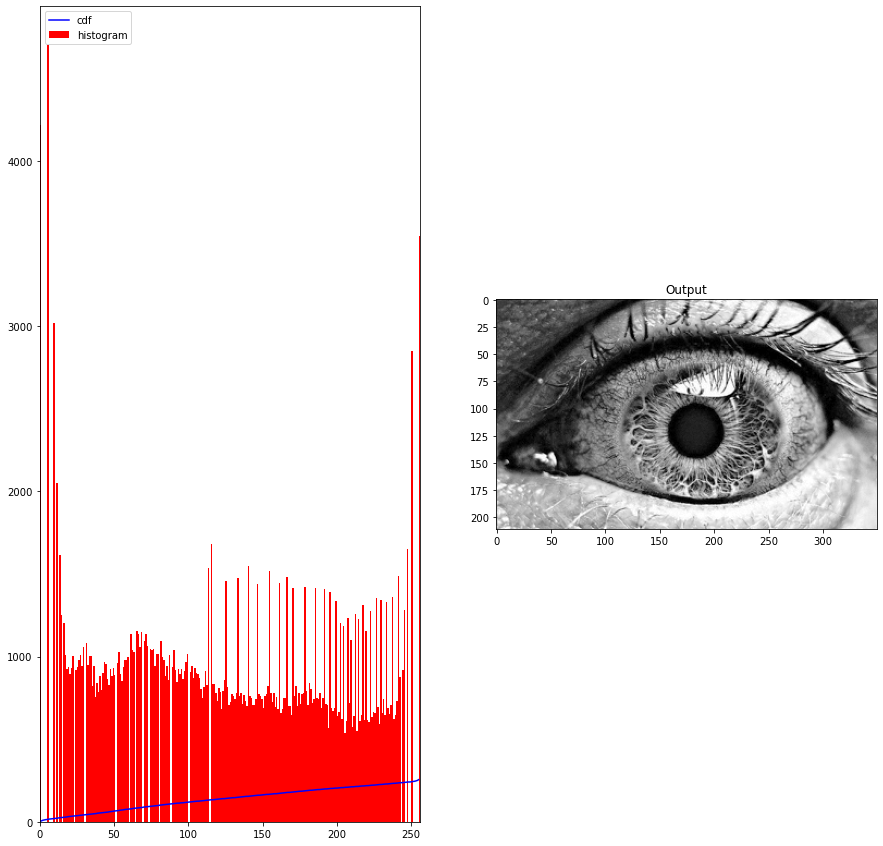

In [10]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(cdf, color = 'b')
ax1 = plt.hist(img2.flatten(),256,[0,256], color = 'r')
ax1 = plt.xlim([0,256])
ax1 = plt.legend(('cdf','histogram'), loc = 'upper left')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)
ax2.set_title('Output')

## Contrast Limited Adaptive Histogram Equalization (CLAHE)

### In the above histogram equalization method, observe that the output image in 5.10 is too bright. Instead of using the histogram of the whole image, in Contrast Limited Adaptive HistogramEqualization ([Zui94]), the image is divided into small regions and a histogram of each region is computed.

Clib_limit = 0.01

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Output')

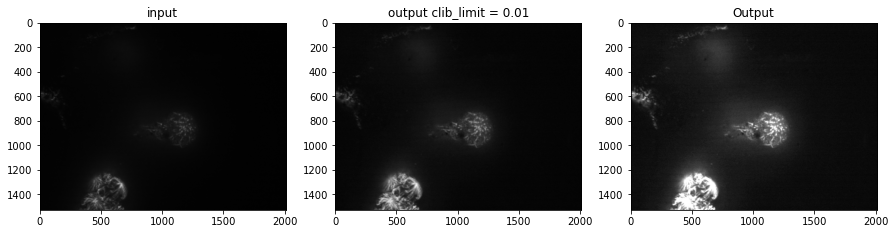

In [11]:
import cv2
from skimage.exposure import equalize_adapthist

img = cv2.imread('../Figures/embryo.png')
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.01)


# Showing
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.set_title('input')

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(img2)
ax1.set_title('output clib_limit = 0.01')

img3 = img2*int(2)

ax1 = fig.add_subplot(1,3,3)
ax1.imshow(img3)
ax1.set_title('Output')

Clib_limit = 0.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Output')

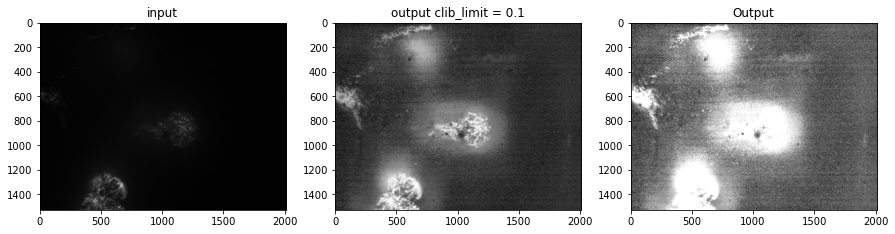

In [12]:
import cv2
from skimage.exposure import equalize_adapthist

img = cv2.imread('../Figures/embryo.png')
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.1)


# Showing
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.set_title('input')

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(img2)
ax1.set_title('output clib_limit = 0.1')

img3 = img2*int(2)

ax1 = fig.add_subplot(1,3,3)
ax1.imshow(img3)
ax1.set_title('Output')

## Contrast Stretching

### Contrast stretching is similar in idea to histogram equalization except that the pixel intensities are rescaled using the pixel values instead of probabilities and CDF. Contrast stretching is used to increase the pixel value range by rescaling the pixel values in the input image.

9 81


Text(0.5, 1.0, 'output')

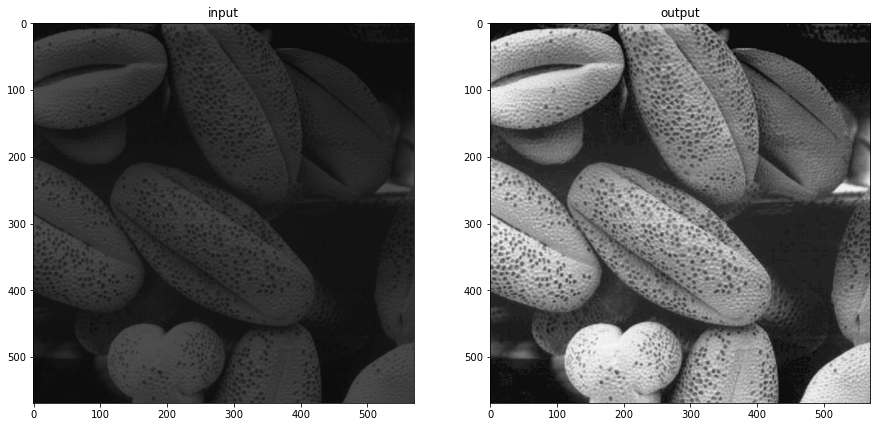

In [13]:
import cv2
# Opening the image.
img = cv2.imread('../Figures/image.jpg')

b = img.max()
a = img.min()
print(a,b)
# Converting im1 to float.
c = img.astype(float)
# Contrast stretching transformation.
img1 = (int(1))*(c-a)/(b-a+0.0000001)
# Showing

# Showing
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.set_title('input')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(img1)
ax1.set_title('output')

## Sigmoid Correction

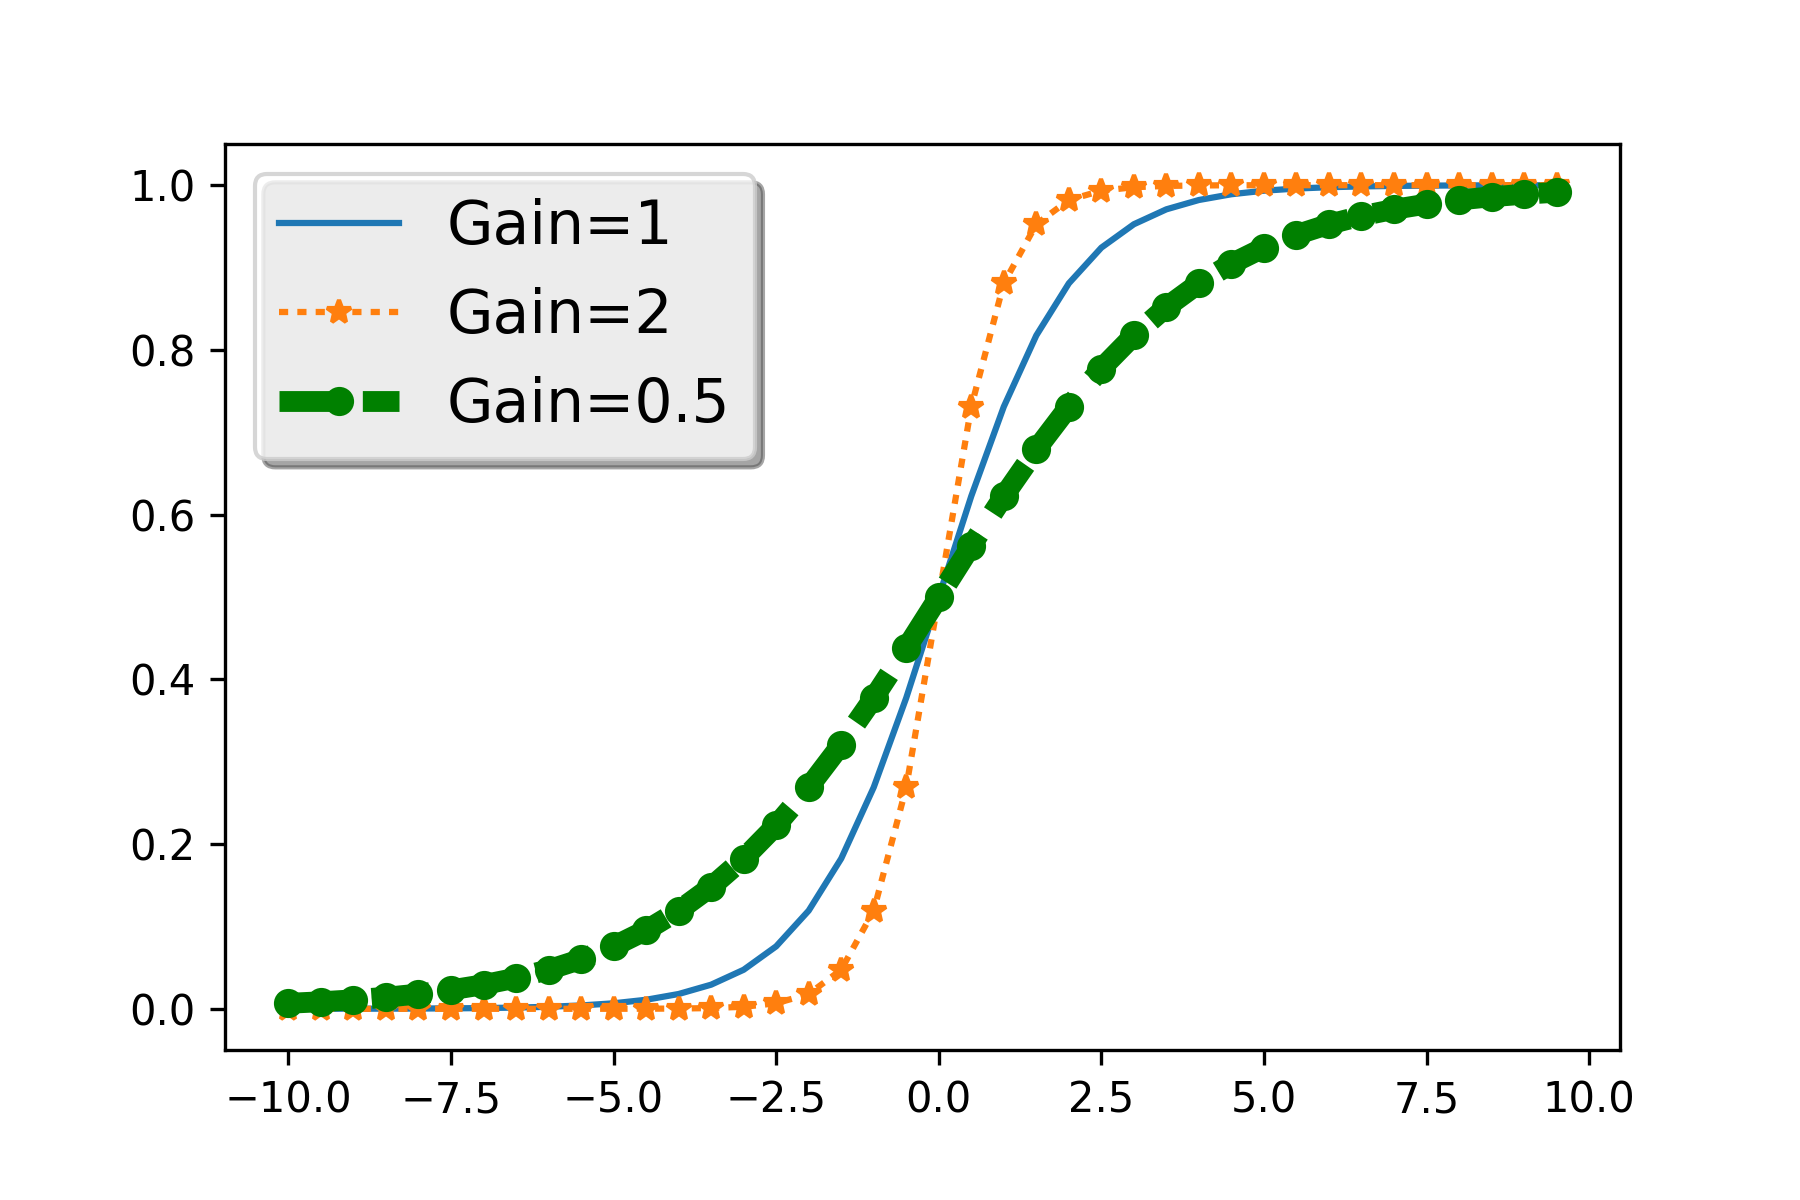

In [14]:
Image("../Figures/sigmoid_gain.png")

Text(0.5, 1.0, 'Output gain = 255')

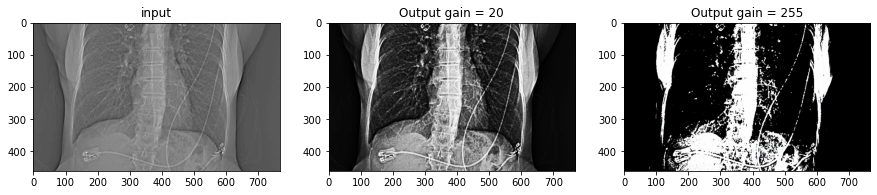

In [15]:
import cv2
from skimage.exposure import adjust_sigmoid
# Reading the image.
img1 = cv2.imread('../Figures/hequalization_input.png')# Applying Sigmoid correction.
# Showing

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img1)
ax1.set_title('input')

img2 = adjust_sigmoid(img1, gain=20)

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img2)
ax2.set_title('Output gain = 20')

img2 = adjust_sigmoid(img1, gain=255)

ax2 = fig.add_subplot(1,3,3)
ax2.imshow(img2)
ax2.set_title('Output gain = 255')

## Local Contrast Normalization

### Local contrast normalization ([JKRL09]) was developed as part of a computational neural model. The method demonstrates that enhancing the pixel value at a certain location depends only on its neighboring pixels and not the ones farther away from it.

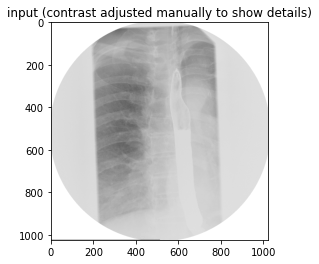

In [16]:
import pydicom
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image

def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y

file_name = "../Figures/FluroWithDisplayShutter.dcm"
dfh = pydicom.read_file(file_name, force=True)
im = dfh.pixel_array
# convert to float and scale before applying filter
im = im.astype(np.float)
im1 = im/np.max(im)
sigma = (5, 5,)
im2 = localfilter(im, sigma)
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())
im4 = Image.fromarray(im3).convert('LA')

imgplot = plt.title('input (contrast adjusted manually to show details)')
imgplot = plt.imshow(im,cmap='gray')

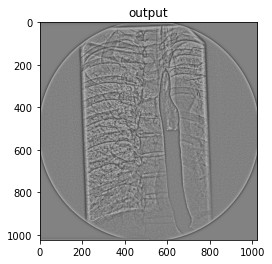

In [17]:
im4 = Image.fromarray(im3).convert('LA')
imgplot = plt.title("output")
imgplot = plt.imshow(im4)